In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Check for GPU
import tensorflow as tf
try:
    from google.colab import drive
    IN_COLAB=True
except:
    IN_COLAB=False

if IN_COLAB:
    print("We're running Colab")
else:
    print(tf.config.list_physical_devices())
    print('\nCUDA GPU: ' + str(tf.test.is_gpu_available(cuda_only=True)))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

CUDA GPU: True


In [3]:
df = pd.read_csv('./hourly02-ithaca/hourly02-NY_Ithaca_13_E.csv', header = 0, index_col = 0)

In [4]:
df

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_5,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100
0,64758,20041027,2200,20041027,1700,1.201,-76.25,42.44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64758,20041027,2300,20041027,1800,1.201,-76.25,42.44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64758,20041028,0,20041027,1900,1.201,-76.25,42.44,7.8,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64758,20041028,100,20041027,2000,1.201,-76.25,42.44,6.5,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64758,20041028,200,20041027,2100,1.201,-76.25,42.44,5.4,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,64758,20231106,0,20231105,1900,2.622,-76.25,42.44,1.1,1.3,...,0.336,0.308,0.307,0.309,0.023,7.6,8.2,8.8,9.1,10.4
7416,64758,20231106,100,20231105,2000,2.622,-76.25,42.44,-0.1,0.0,...,0.336,0.309,0.307,0.309,0.021,7.3,8.0,8.8,9.1,10.4
7417,64758,20231106,200,20231105,2100,2.622,-76.25,42.44,-0.5,-0.4,...,0.336,0.309,0.308,0.309,0.022,7.0,7.9,8.7,9.2,10.4
7418,64758,20231106,300,20231105,2200,2.622,-76.25,42.44,-1.4,-1.3,...,0.336,0.309,0.308,0.309,0.022,6.8,7.7,8.6,9.1,10.6


In [5]:
Date = pd.to_datetime(df.UTC_DATE, format='%Y%m%d', errors='coerce')
+ pd.to_timedelta(df.UTC_TIME//100, unit = 'hours')
df['Time'] = Date

In [6]:
df.columns

Index(['WBANNO', 'UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN',
       'LONGITUDE', 'LATITUDE', 'T_CALC', 'T_HR_AVG', 'T_MAX', 'T_MIN',
       'P_CALC', 'SOLARAD', 'SOLARAD_FLAG', 'SOLARAD_MAX', 'SOLARAD_MAX_FLAG',
       'SOLARAD_MIN', 'SOLARAD_MIN_FLAG', 'SUR_TEMP_TYPE', 'SUR_TEMP',
       'SUR_TEMP_FLAG', 'SUR_TEMP_MAX', 'SUR_TEMP_MAX_FLAG', 'SUR_TEMP_MIN',
       'SUR_TEMP_MIN_FLAG', 'RH_HR_AVG', 'RH_HR_AVG_FLAG', 'SOIL_MOISTURE_5',
       'SOIL_MOISTURE_10', 'SOIL_MOISTURE_20', 'SOIL_MOISTURE_50',
       'SOIL_MOISTURE_100', 'SOIL_TEMP_5', 'SOIL_TEMP_10', 'SOIL_TEMP_20',
       'SOIL_TEMP_50', 'SOIL_TEMP_100', 'Time'],
      dtype='object')

In [7]:
data = df[['T_CALC', 'T_HR_AVG', 'T_MAX', 'T_MIN',
       'P_CALC', 'SOLARAD', 'SOLARAD_MAX',
       'SOLARAD_MIN', 'SUR_TEMP',
           'SUR_TEMP_MAX', 'SUR_TEMP_MIN', 'RH_HR_AVG']]

In [8]:
data.index = df['Time']

In [9]:
# check for N/A
data.min()

T_CALC         -30.8
T_HR_AVG       -29.3
T_MAX          -28.4
T_MIN          -30.9
P_CALC           0.0
SOLARAD          0.0
SOLARAD_MAX      0.0
SOLARAD_MIN      0.0
SUR_TEMP       -35.8
SUR_TEMP_MAX   -61.0
SUR_TEMP_MIN   -36.0
RH_HR_AVG        0.0
dtype: float64

In [10]:
data

,T_CALC,T_HR_AVG,T_MAX,T_MIN,P_CALC,SOLARAD,SOLARAD_MAX,SOLARAD_MIN,SUR_TEMP,SUR_TEMP_MAX,SUR_TEMP_MIN,RH_HR_AVG
Time,,,,,,,,,,,,
2004-10-27,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,8.8,NaN,NaN,0.0
2004-10-27,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,6.7,NaN,NaN,0.0
2004-10-28,7.8,7.6,8.0,7.3,0.0,0.0,NaN,NaN,6.1,NaN,NaN,0.0
2004-10-28,6.5,7.0,7.8,6.5,0.0,0.0,NaN,NaN,5.6,NaN,NaN,0.0
2004-10-28,5.4,6.2,6.5,5.4,0.0,0.0,NaN,NaN,5.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,1.1,1.3,2.1,0.3,0.0,0.0,0.0,0.0,-1.6,-0.9,-2.0,76.0
2023-11-06,-0.1,0.0,1.0,-1.1,0.0,0.0,0.0,0.0,-2.3,-1.9,-2.8,80.0
2023-11-06,-0.5,-0.4,0.1,-0.7,0.0,0.0,0.0,0.0,-3.1,-2.8,-3.3,83.0


In [11]:
data.isna().sum()

T_CALC           1384
T_HR_AVG         1446
T_MAX            1385
T_MIN            1389
P_CALC            832
SOLARAD           570
SOLARAD_MAX      9757
SOLARAD_MIN      9757
SUR_TEMP          724
SUR_TEMP_MAX     9911
SUR_TEMP_MIN     9911
RH_HR_AVG       48248
dtype: int64

In [12]:
# Check data types
data.dtypes

T_CALC          float64
T_HR_AVG        float64
T_MAX           float64
T_MIN           float64
P_CALC          float64
SOLARAD         float64
SOLARAD_MAX     float64
SOLARAD_MIN     float64
SUR_TEMP        float64
SUR_TEMP_MAX    float64
SUR_TEMP_MIN    float64
RH_HR_AVG       float64
dtype: object

In [13]:
data.shape

(166759, 12)

In [14]:
# forward fill the missing values  
data.ffill(axis = 0, inplace = True) 

In [15]:
data

,T_CALC,T_HR_AVG,T_MAX,T_MIN,P_CALC,SOLARAD,SOLARAD_MAX,SOLARAD_MIN,SUR_TEMP,SUR_TEMP_MAX,SUR_TEMP_MIN,RH_HR_AVG
Time,,,,,,,,,,,,
2004-10-27,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,8.8,NaN,NaN,0.0
2004-10-27,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,6.7,NaN,NaN,0.0
2004-10-28,7.8,7.6,8.0,7.3,0.0,0.0,NaN,NaN,6.1,NaN,NaN,0.0
2004-10-28,6.5,7.0,7.8,6.5,0.0,0.0,NaN,NaN,5.6,NaN,NaN,0.0
2004-10-28,5.4,6.2,6.5,5.4,0.0,0.0,NaN,NaN,5.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,1.1,1.3,2.1,0.3,0.0,0.0,0.0,0.0,-1.6,-0.9,-2.0,76.0
2023-11-06,-0.1,0.0,1.0,-1.1,0.0,0.0,0.0,0.0,-2.3,-1.9,-2.8,80.0
2023-11-06,-0.5,-0.4,0.1,-0.7,0.0,0.0,0.0,0.0,-3.1,-2.8,-3.3,83.0


In [16]:
# drop NaN at the top
data.dropna(inplace = True)

In [17]:
# set target
data['target'] = data['T_HR_AVG']

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled_data, test_size=0.2, shuffle = False)

In [20]:
train.shape

(126057, 13)

In [21]:
test.shape

(31515, 13)

In [22]:
# splitting data into sequences
def split_sequences(features, target, seq_len, forecast_len):
    X,y = list(), list()
    for i in range(len(features)):
        end_input = i + seq_len
        end_predict = end_input + forecast_len
        if end_predict > len(features)-1:
            break
        seq_x, seq_y = features[i:end_input,:], target[end_input:end_predict]
        X.append(seq_x)
        y.append(seq_y)
    return tf.convert_to_tensor(X, dtype=tf.float64), tf.convert_to_tensor(y, dtype=tf.float64)

In [23]:
# input:predict = 4:1
seq_len = 16
forecast_len = 4
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)

In [24]:
X_train.shape

TensorShape([126037, 16, 12])

In [25]:
y_train.shape

TensorShape([126037, 4])

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RNN, LSTMCell, Input
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

model = Sequential([
    LSTM(units=30, activation = 'tanh', input_shape = X_train.shape[1:], return_sequences=False, name = 'lstm_1'),
    Dense(units=20, activation = 'relu', name = 'dense_1'),
    Dense(units=10, activation = 'relu', name = 'dense_2'),
    Dense(units=forecast_len, activation = None, name = 'dense_3')
    
], name = 'sequential')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                5160      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 6,034
Trainable params: 6,034
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse', 'acc'])
model.fit(X_train, 
          y_train, 
          batch_size=100,
          epochs=30,
          verbose='auto',
          callbacks=None,
          validation_split=0.2,
          shuffle=True)

Epoch 1/30
1009/1009 [==============================] - 10s 8ms/step - loss: 0.0052 - mse: 0.0052 - acc: 0.3854 - val_loss: 7.8937e-04 - val_mse: 7.8937e-04 - val_acc: 0.4952
Epoch 2/30
1009/1009 [==============================] - 8s 8ms/step - loss: 7.8485e-04 - mse: 7.8485e-04 - acc: 0.5908 - val_loss: 5.9724e-04 - val_mse: 5.9724e-04 - val_acc: 0.5883
Epoch 3/30
1009/1009 [==============================] - 8s 8ms/step - loss: 6.4868e-04 - mse: 6.4868e-04 - acc: 0.6330 - val_loss: 5.3552e-04 - val_mse: 5.3552e-04 - val_acc: 0.5908
Epoch 4/30
1009/1009 [==============================] - 8s 8ms/step - loss: 6.1451e-04 - mse: 6.1451e-04 - acc: 0.6393 - val_loss: 6.4374e-04 - val_mse: 6.4374e-04 - val_acc: 0.6070
Epoch 5/30
1009/1009 [==============================] - 8s 8ms/step - loss: 5.8839e-04 - mse: 5.8839e-04 - acc: 0.6441 - val_loss: 7.7007e-04 - val_mse: 7.7007e-04 - val_acc: 0.6512
Epoch 6/30
1009/1009 [==============================] - 8s 8ms/step - loss: 5.7623e-04 - mse: 5.7

In [29]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

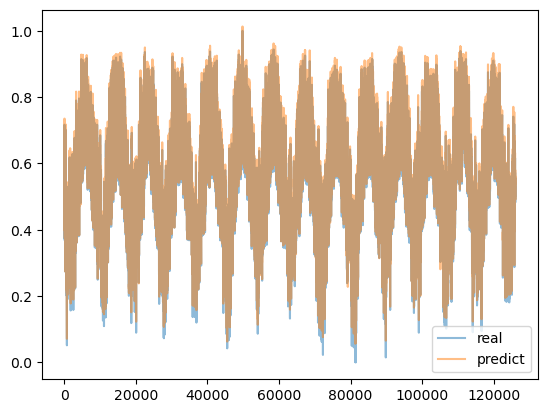

In [30]:
plt.plot(y_train[:,0], label = 'real', alpha = 0.5)
plt.plot(y_hat_train[:,0], label = 'predict', alpha = 0.5)
plt.legend()
plt.show()

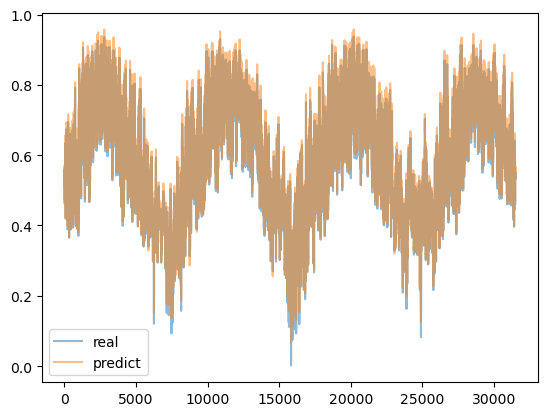

In [31]:
plt.plot(y_test[:,0], label = 'real', alpha = 0.5)
plt.plot(y_hat_test[:,0], label = 'predict', alpha = 0.5)
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import r2_score

print('r2')
print('train set:', r2_score(y_train, y_hat_train, sample_weight=None))
print('test set:', r2_score(y_test, y_hat_test, sample_weight=None))

r2
train set: 0.9811644833206924
test set: 0.977084606113834
